In [8]:
#**CREDIT CARD FRAUD DETECTION**


#Objective

#Predict whether a transaction is fraudulent based on various features of transaction.
#This is a binary classification problem where target variable is 'Fraud' , indicating
#whether a transaction is fraudlent(1) or legitimate(0).

In [9]:
# DATA DICTIONARY

#1. TransactionID : Unique identifier for each transaction(integer)
#2. TransactionAmount : Amount of the transaction in USD(float)
#3. TransactionTime : Time of the transaction in hours since the first transaction(float)
#4. MerchantCategory : Category of the merchant(categorical: 'Retail','Online','Restaurant','Travel')
#5. CustomerAge : Age of the customer making the transaction (integer, ranging from 18 to 80)
#6. CustomerGender : Gender of the customer(categorical : 'Male','Female')
#7. CustomerIncome : Annual income of the customer in USD(integer , ranging from 20,000 to 200,000).
#8. TransactionLocation : Location where the transaction took place (categorical : 'Urban', 'Suburban','Rural')
#9. PreviousFraudCount : Number of fraudlent transactions by the customer in the past 6 months(integer : ranging from 0 to 5)
#10. Fraud : Target variable indicating whether the transaction is fraudlent(1) or not(0) (binary)

In [2]:
#Building a model using Logistic Regression Algorithm

#Import necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
#Load the dataset
df = pd.read_csv('credit_card_data.csv')

#display the first few rows of the dataset
df.head()

,TransactionID,TransactionAmount,TransactionTime,MerchantCategory,CustomerAge,CustomerGender,CustomerIncome,TransactionLocation,PreviousFraudCount,Fraud
0,1,1873.33,13.33,Travel,68,Male,166232,Rural,4,1
1,2,4753.62,39.02,Restaurant,64,Female,185070,Urban,0,0
2,3,3660.24,62.85,Restaurant,80,Female,178302,Rural,3,1
3,4,2993.69,52.72,Restaurant,64,Female,160148,Suburban,5,1
4,5,780.94,58.07,Travel,21,Female,89341,Suburban,1,0


In [12]:
#Essential Exploratory Data Analysis (EDA)
#summary statistics

df.describe()

,TransactionID,TransactionAmount,TransactionTime,CustomerAge,CustomerIncome,PreviousFraudCount,Fraud
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2451.792450,36.505210,48.926000,110411.768000,2.497000,0.513000
std,288.819436,1460.394621,21.037705,18.027688,51999.780486,1.691997,0.500081
min,1.000000,24.160000,0.230000,18.000000,20287.000000,0.000000,0.000000
25%,250.750000,1180.632500,17.360000,34.000000,66143.500000,1.000000,0.000000
50%,500.500000,2484.540000,37.350000,49.000000,108478.500000,3.000000,1.000000
75%,750.250000,3721.855000,54.752500,64.000000,156281.500000,4.000000,1.000000
max,1000.000000,4998.590000,71.960000,80.000000,199992.000000,5.000000,1.000000


In [4]:
#check for missing values
df.isnull().sum()

TransactionID          0
TransactionAmount      0
TransactionTime        0
MerchantCategory       0
CustomerAge            0
CustomerGender         0
CustomerIncome         0
TransactionLocation    0
PreviousFraudCount     0
Fraud                  0
dtype: int64

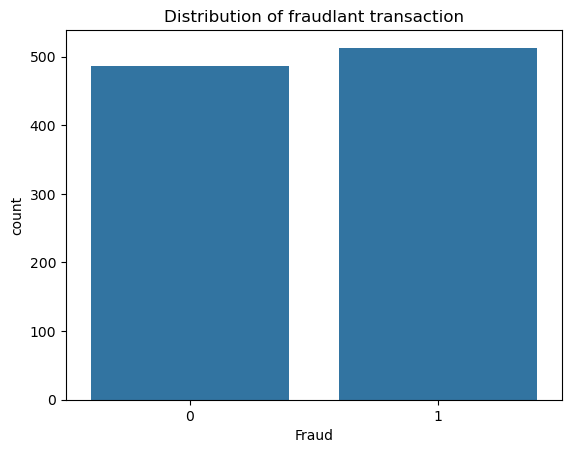

In [5]:
#distribution of target variable

sns.countplot(x='Fraud', data = df)
plt.title("Distribution of fraudlant transaction")
plt.show()

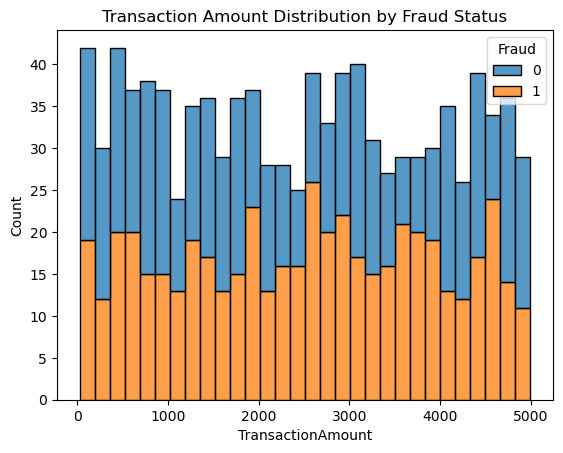

In [6]:
#distribution of transaction amount by fraud status

sns.histplot(data=df, x='TransactionAmount', hue='Fraud', multiple='stack', bins = 30)
plt.title("Transaction Amount Distribution by Fraud Status")
plt.show()

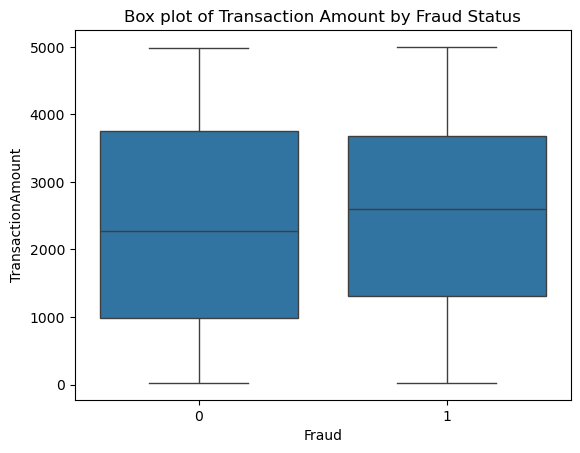

In [16]:
#Box plot for transaction Amount by Fraud Status

sns.boxplot(x='Fraud', y='TransactionAmount', data=df)
plt.title("Box plot of Transaction Amount by Fraud Status")
plt.show()

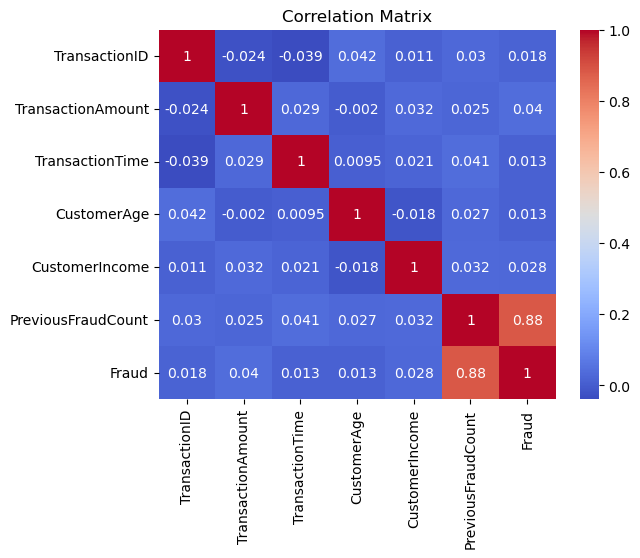

In [7]:
#correlation matrix

num_cols = list()
for column in df.columns:
    if df[column].dtype != object:
        num_cols.append(column)

correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [8]:
#Data PreProcessing
#Encode Categorical variables

label_encoders = {}
for column in ['MerchantCategory','CustomerGender','TransactionLocation']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

#Features and target

X = df.drop(['TransactionID','Fraud'], axis =1)
y = df['Fraud']

In [19]:
X.head()

,TransactionAmount,TransactionTime,MerchantCategory,CustomerAge,CustomerGender,CustomerIncome,TransactionLocation,PreviousFraudCount
0,1873.33,13.33,3,68,1,166232,0,4
1,4753.62,39.02,1,64,0,185070,2,0
2,3660.24,62.85,1,80,0,178302,0,3
3,2993.69,52.72,1,64,0,160148,1,5
4,780.94,58.07,3,21,0,89341,1,1


In [9]:
# split data into training and testing sets
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [10]:
#featuring scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
#Logistics Regression

from sklearn.linear_model import LogisticRegression
#here linear_model is a module and logisticRegression is a class

logreg = LogisticRegression() #instance of logisticRegression class is created
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)

In [12]:
#Display accuracy and performance metrics

print(f'Logistic Regression Accuracy : {logreg_accuracy*100:.2f}')
print('\nLogistic Regression Classification Report :')
print(classification_report(y_test, logreg_pred))

Logistic Regression Accuracy : 100.00

Logistic Regression Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00       145

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

